In [29]:
#Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## We will work with the "Adult" Data Set of the UCI Repository

Here we will try to predict whether one's salary is above or below $50,000/year. 
The original dataset can be found on UCI Repository: https://archive.ics.uci.edu/ml/datasets/adult

### Read the file

In [30]:
# Source: https://www.valentinmihov.com/2015/04/17/adult-income-data-set/
# taken and modified slightly from https://fairmlbook.org/code/adult.html

features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"] #feaures of the dataset 

# Change these to local file if available
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' #link of the training data
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' #link of the test data

# This will download 3.8M
df_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', 
                             engine='python', na_values="?") #read csv training
# This will download 1.9M
df_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', 
                            engine='python', na_values="?", skiprows=1) #read csv test

num_train = len(df_train) #number of training instances

### Q1: Replace the labels of the training and test sets so that "Target = 1" means high income and "Target = 0" means low income. The target column should be an integer (binary) column eventually.

#### A1:

In [31]:
#first list the training values possible
print("Unique values in training set target", df_train.Target.unique())
print("Unique values in test set target", df_test.Target.unique())

Unique values in training set target ['<=50K' '>50K']
Unique values in test set target ['<=50K.' '>50K.']


In [32]:
#now we can replace the labels
df_train.Target = df_train.Target.replace('<=50K', 0).replace('>50K', 1)
df_test.Target = df_test.Target.replace('<=50K.', 0).replace('>50K.', 1)

### Q2: Inspect the column names and the data type of each column. Answer the following.

#### Q2.1: List how many missing values there are in each column for training and test sets.

#### A2.1:

In [33]:
#first list the columns
pd.set_option('max_colwidth', None)
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [34]:
#now see the number of missing values for each column -- training
df_train.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [35]:
#now see the number of missing values for each column -- test
df_test.isna().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education-Num       0
Martial Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per week      0
Country           274
Target              0
dtype: int64

#### Q2.2: How many missing values there are in total for the training set?

#### A2.2:

In [36]:
#same answer but we sum all the NaN's
np.sum(df_train.isna().sum())

4262

#### Q2.3: How many rows are there with at least one NaN?

#### A2.3:

In [37]:
#take a True/False Series for whether the row includes NaN. Then sum them, where True will be taken as = 1.
np.sum(df_train.isna().any(axis=1))

2399

#### Q2.4: If NaN's were identially distributed among the NaN rows at random, then what is the expectation of the number of NaNs in a row that has at least one NaN? If you find the same expectation for the test set, do these values look alike?

#### A2.4:

In [38]:
#divide the previous two answers.
np.sum(df_train.isna().sum())/np.sum(df_train.isna().any(axis=1))

1.7765735723218008

In [39]:
#same for the test set
np.sum(df_test.isna().sum())/np.sum(df_test.isna().any(axis=1))
#it looks like these values are similar.

1.8042588042588044

### Q3: Let us inspect the target variable further.

#### Q3.1: What fraction of the training instances are making high income? Does a similar result hold for the test set?

#### A3.1:

In [40]:
df_train["Target"].value_counts(normalize = True)
#we can see that more than 75% of the instances are making less than 50,000 a year

Target
0    0.75919
1    0.24081
Name: proportion, dtype: float64

In [41]:
df_test["Target"].value_counts(normalize = True) #hence a similar result follows

Target
0    0.763774
1    0.236226
Name: proportion, dtype: float64

#### Q3.2: If we classify everyone as a low-income instance, what is our accuracy, sensitivity, and specificy in the test set? Assume that a "positive" class is a high income class, that is, our end goal is to be able to tell who makes more money.

#### A3.2:

In [42]:
accuracy = len(df_test[df_test['Target']==0])/len(df_test)
#this is the same as df_train["Target"].value_counts(normalize = True)[0]
sensitivity = 0 #we never said "1" so we cannot classify any "1" correctly
specificity = 1 #we say "0" to all instances, so we cannot miss any 0's

#### Q3.3: List the fraction of high income instances within each group of "workclass" separately in the training set. Do you have an intuition on this?

#### A3.3:

In [43]:
#First group by workclasses, take target, average it, and then print it in an ascending way.
df_train.groupby('Workclass', as_index=False)['Target'].mean().sort_values(by=['Target'], ascending=False)

,Workclass,Target
4,Self-emp-inc,0.557348
0,Federal-gov,0.386458
1,Local-gov,0.294792
5,Self-emp-not-inc,0.284927
6,State-gov,0.271957
3,Private,0.218673
2,Never-worked,0.000000
7,Without-pay,0.000000


#### Q3.4: Motivated by the question before, apply the following simple classification on the test set: if an instance has a workclass that is in the first or second highest-making group, then classify "1". What is the accuracy and the sensitivity of this model?

#### A3.4:

In [44]:
greedy_workclass = df_test.apply(lambda row: 1 if (row["Workclass"] == "Self-emp-inc") or\
                                 (row["Workclass"] == "Federal-gov") else 0, axis = 1) #apply the function to predict

In [45]:
from sklearn.metrics import confusion_matrix #import sklearn's confusion matrix
cm = confusion_matrix(df_test.Target, greedy_workclass) #obtain the confusion matrix

In [46]:
total = len(df_test.Target) #number of instances
correct = cm[0][0] + cm[1][1] #number of collectly classified instances -- sum of the diagonal
accuracy = correct/total #fraction of correct classifications
sensitivity = cm[1][1] / (cm[1][0] + cm[1][1]) #fraction of 1's that we can find out of true 1's

In [47]:
print("Accuracy:", accuracy, ", and Sensitivity:", sensitivity)

Accuracy: 0.7613782937166022 , and Sensitivity: 0.1315652626105044


### Q4: Further statistics and Outliers.

#### Q4.1: List the fraction of male and females within US citizens in the training set.

#### A4.1:

In [48]:
df_train[df_train["Country"]=="United-States"]["Sex"].value_counts(normalize = True)

Sex
Male      0.668084
Female    0.331916
Name: proportion, dtype: float64

#### Q4.2: What is the most common occupation (training set)?

#### A4.2:

In [49]:
df_train['Occupation'].value_counts().idxmax() #first filter 

'Prof-specialty'

#### Q4.3: Which occupations are the most common male and female instances, respectively (training set)?

#### A4.3:

In [50]:
df_train[df_train["Sex"]=="Female"]['Occupation'].value_counts().idxmax() #most common female job

'Adm-clerical'

In [51]:
df_train[df_train["Sex"]=="Male"]['Occupation'].value_counts().idxmax() #most common male job

'Craft-repair'

#### Q4.4: Plot the histogram of the "Age" column (using training set data). Let the histogram have 10 bins, and reflect the percentage of instances falling in the relevant bin on Y axis.  Visually try to see if there are outliers. Are there more outliers on the high age, or low age?

#### A4.4: 

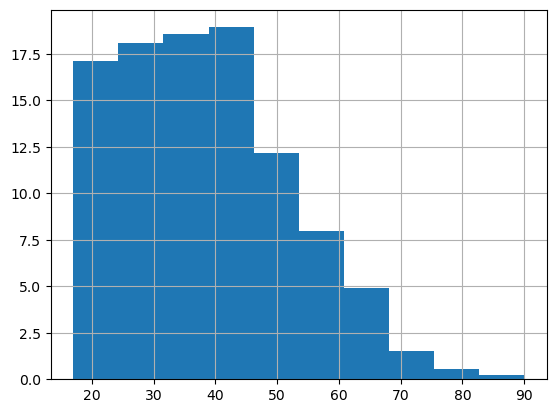

In [52]:
df_train["Age"].hist(bins=10, weights=np.ones_like(df_train["Age"]) * 100. / len(df_train)).plot()
plt.show()
plt.close()

#### Q4.5: Report the age on the $99$-th quantile. 

#### A4.5:

In [53]:
df_train["Age"].quantile(0.99) #the ".quantile" function of pandas datframe will be enough

74.0

#### Q4.6: Given the previous analysis, would you say there are outliers in this dataset? 

#### A4.6:
There is no specific answer. However, the 99-th quantile is the age 74, which is quite feasible and it is not an 'erronous' outlier.

### Q5: Inspect the correlation of the numerical predictors with the target and report your findings (in training set). What does the correlation of "Age" tell us?

In [54]:
df_train.corrwith(df_train["Target"], method = 'pearson') #here we will have only numerical values
#the more the age is, the more likely a person gets to have a high income.

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Q6: Let us apply Linear Regression for classification. 

#### Q6.1: Discuss why Linear Regression is not immediately applicable in this setting.

#### A6.1: 
Linear Regression, as the name suggests, is a regression method but we would like to apply classification.

#### Q6.2: Drop rows that include NaN values.

#### A6.2:

In [ ]:
df_save = df_train.copy()   #save for later

In [ ]:
df_train = df_train.dropna(how='any') #drop

#### Q6.3: Train a linear regression model on the training set. Use the numeric columns only.

#### A6.3:

In [ ]:
#Step 1 -- take the numeric columns
numericals = [] #start with an empty array
for i in range(len(df_train.dtypes)): #for all columns
    coltype = df_train.dtypes[i] #take the type of column
    if coltype != 'object' and df_train.columns[i] != 'Target': #object types are the categorical variables
        numericals.append(df_train.columns[i])

In [ ]:
#Step 2 -- fit
from sklearn.linear_model import LinearRegression
X = df_train[numericals] #training predictors
y = df_train.Target #training target
clf = LinearRegression().fit(X, y) #time to fit

#### Q6.4: Apply the linear model that we just fit and predict the training target. Show the first couple of predictions.

#### A6.4: 

In [ ]:
scores_linear_training = clf.predict(X) #predict

In [ ]:
scores_linear_training[:5] #we can see these are continuous, not {0,1}

#### Q6.5: To make a classification on the *training set*, use a cutoff value = 0.4 so that if the output is more than this value then we classify as "1". Compute the accuracy, sensitivity, and specificity manually (do not use a function). Discuss the performance.

#### A6.5: 

In [ ]:
cutoff = 0.4 #cutoff value
predicted_linear_training = (scores_linear_training >= cutoff) #take the scores, and apply the logical

In [ ]:
predicted_linear_training[:9] #here are some of the classifications

In [ ]:
def metrics(cm): #this function returns relevant statistics
    total = cm[0][0] + cm[1][1] +  cm[0][1] +  cm[1][0]
    correct = cm[0][0] + cm[1][1]
    accuracy = correct/total
    specificity = cm[0][0] / (cm[0][0] + cm[0][1])
    sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
    return total, correct,accuracy,specificity,sensitivity

In [ ]:
total_train, correct_train,accuracy_train,specificity_train,sensitivity_train \
= metrics(confusion_matrix(df_train.Target, predicted_linear_training)) #get all the metrics

In [ ]:
print("Accuracy:", round(accuracy_train,3), "\nSensitivity:", round(sensitivity_train,3),\
      "\nSpecificity:", round(specificity_train,3))

Dicussion: 
- Accuracy is 79.6%, which is better than the 75% accuracy we can obtain if we say "0" to all.
- Sensitivity is 47.9%, which is better than the 24% sensitivity we can obtain if we say "1" to all.
- Both metrics improve the greedy method we applied.

#### Q6.6: Apply the same on training set but decrease the cutoff down to 0.2. Inspect the metrics we looked before, and compare the results with the cutoff 0.4. Interpret the results.

#### A6.6:

In [ ]:
cutoff_altenative = 0.2 #cutoff value
predicted_linear_training_alternative = (scores_linear_training >= cutoff_altenative)

In [ ]:
_, _,accuracy_train_alt,specificity_train_alt,sensitivity_train_alt \
= metrics(confusion_matrix(df_train.Target, predicted_linear_training_alternative)) #get all the metrics

In [ ]:
print("Accuracy:", round(accuracy_train_alt,3), "\nSensitivity:", round(sensitivity_train_alt,3),\
      "\nSpecificity:", round(specificity_train_alt,3))

Discussion:
- We have a much better accuracy with a cost of worse specificity. In return, our accuracy gets worse. 

#### Q6.7: Now use the linear model on the *test set*. Choose the cutoff value = 0.4 and return the accuracy, sensitivity, and specificity.

#### A6.7:

In [ ]:
X_test = df_test[numericals] #extract predictors
y_test = df_test.Target #same for test target
cutoff_test = 0.4
scores_linear_test = clf.predict(X_test)
predicted_linear_test = (scores_linear_test >= cutoff_test)

In [ ]:
_, _,accuracy_test,specificity_test,sensitivity_test \
= metrics(confusion_matrix(df_test.Target, predicted_linear_test)) #get all the metrics

In [ ]:
print("Accuracy:", round(accuracy_test,3), "\nSensitivity:", round(sensitivity_test,3),\
      "\nSpecificity:", round(specificity_test,3))

#### Q6.8: Try different cutoff values on the training set and choose the best one according to the performance on the training set. Choose the following metric to optimize: *keep accuracy above 76% and trying to obtain the best possible sensitivity*. What is the optimal cutoff value in your experiment? (Note: this approach will be discussed later).

#### A6.8: 
- Application of the previous chunks in an iterated manner. We do not provide a solution here.

#### Q6.9: In the previous question we tuned the cutoff value on the training set. This initialy makes sense, because we cannot tune on the test-set, which will be indirectly training on the test set. However, we also discussed in the validation-set approach that it is not a good practice to *compare* models on the training set, because of a natural bias in this procedure. Hence, it is a better approach to tune a value on a validation set. For this purpose, apply the following steps:
- Split the training set as 80% (training) - 20% (validation) sets. You can take the first 80% and last 20% and no need to randomize the selection.
- Train a linear model on the training set obtained in the previous approach. Training one model is enough.
- Compare cutoff values between 0.2 - 0.8 with 0.05 increments. Pick the best model by looking at the validation set, where the "best" model has an accuracy over 76% and has the highest sensitivity still.
- Test the validated cutoff on the test set and return the metrics.
- [Extra / optional] Instead of the hold-out validation that you just applied, try 5-fold cross validation in the original training set.

#### A6.9

In [ ]:
# Step 1 -- split
training_nr = round(len(X)*0.8)
train_80 = X[:training_nr]
y_train_80 = df_train[:training_nr].Target #training target
validate_20 = X[training_nr:]
y_validate_20 = df_train[training_nr:].Target #training target

In [ ]:
# Step 2 -- train
clf = LinearRegression().fit(train_80, y_train_80) #time to fit

In [ ]:
# Step 3 -- try cutoffs
scores_linear_validation = clf.predict(validate_20) #predict
cutoffs = np.arange(0.2,0.85, 0.05)
max_cutoff = 0
max_sensitivity = 0
for cutoff in cutoffs:
    predicted_linear_validated = (scores_linear_validation >= cutoff)
    _, _,accuracy_validate,specificity_validate, sensitivity_validate \
        = metrics(confusion_matrix(y_validate_20, predicted_linear_validated)) #get all the metrics
    if accuracy_validate >= 0.76 and sensitivity_validate >= max_sensitivity:
        max_cutoff = cutoff
        max_sensitivity = sensitivity_validate
        max_accuracy = accuracy_validate

In [ ]:
print("The best cutoff value is", max_cutoff, "with a validation accuracy of", round(max_accuracy,3), \
      "and a validation sensitivity of", round(max_sensitivity,3))

In [ ]:
# step 4 -- test this
scores_validated_test = clf.predict(X_test)
predicted_validated_test = (scores_validated_test >= max_cutoff)
_, _,accuracy_test,specificity_test,sensitivity_test \
    = metrics(confusion_matrix(df_test.Target, predicted_validated_test)) #get all the metrics
print("Accuracy:", round(accuracy_test,3), "\nSensitivity:", round(sensitivity_test,3),\
      "\nSpecificity:", round(specificity_test,3)) #we are done!

#### Q6.10: Previously we have seen that if we decrese the cutoff value then we get more sensitivity as we try to classify more "1"s. Obviously we would expect to have sensitivity = 1 if we pick the smallest possible cutoff. To this end, try a cutoff = 0 on the test set and report the sensitivity. If the sensitivity is not equal to 1, please give a possible reason.

#### A6.10:

In [ ]:
predicted_validated_test = (scores_validated_test >= 0)
_, _,_,_,sensitivity_test = metrics(confusion_matrix(df_test.Target, predicted_validated_test))
print("\nSensitivity:", round(sensitivity_test,3)) #we are done!

- Reason: Linear regression does not necessarily return a value between 0 and 1.

#### Q6.11 [Bonus / Optional]: Encode "worksclass" with dummies so that we can include these variables in the linear regression (i.e., introduce a column for each value the workclass can take and write '1' if this is true -- note that you should drop one of these dummies without loss of generality as from the others you can figure out the one left out). Train the linear regression by using this new variable in addition to the previous variables. Test on the test set by using the cutoff value you found previously.

#### A6.11:
- Answer not provided, however, one can iterate over the ".dtypes" of the training set and for every "O" data type, convert this to "Categorical". Then, using "pd.get_dummies" one can obtain dummies on this categorical variable. The rest is identical to what we did before -- only add the new additional numeric values.

### Final notes
Note that linear regression is not designed for such tasks, however, it works great in many cases. A variant of linear regression, that is called the *logistic regression*, takes a linear relationship as in the linear regression setting, but applies a non-linear mapping on the output. In return, we obtain predictions that are between [0,1], hence simply using "predict" function would classify as "1" the instances with >= 0.5 prediction. We can similarly change the threshold. Although logistic regression will be introduced in more detail, we can also write similar code to make use of it easily as the following. 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
scores_linear_training = clf.predict(X) #predict function
# alternatively, for using a cutoff, first get the assigned 'probabilities' by using "probs = clf.predict_proba(X)"
# and then apply thresholds.

In [ ]:
total_train, correct_train,accuracy_train,specificity_train,sensitivity_train \
= metrics(confusion_matrix(df_train.Target, scores_linear_training))

As extra, you can try coding other concepts such as:
- Visualising lift charts and comparing models via lift charts.
- Applying more advanced algorithms and/or using further categorial variables by using several encodings.
- Analyzing the categorical variables further to see if we have an ordinal relationship that can be modeled via integers.
- As mentioned above, using K fold cross validation.